# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [89]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [16]:
data = pd.read_csv('train.csv')

In [17]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [90]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [74]:
train.isnull().sum()

id             0
keyword       44
location    1760
text           0
target         0
dtype: int64

In [91]:
train["keyword"] = train["keyword"].fillna('')
train["location"] = train["location"].fillna('')
test["keyword"] = test["keyword"].fillna('')
test["location"] = test["location"].fillna('')
train.head()

,id,keyword,location,text,target
1186,1707,bridge%20collapse,,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1
5787,8257,rioting,,Still rioting in a couple of hours left until ...,1
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0


## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


<AxesSubplot: xlabel='target', ylabel='count'>

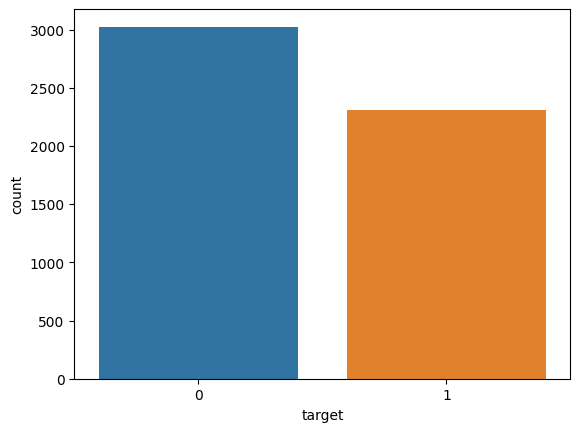

In [78]:
import seaborn as sns
sns.countplot(x=train["target"])

2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [79]:
popular_keywords = train['keyword'].value_counts()[:11].reset_index()
list(popular_keywords['index'])

['',
 'damage',
 'siren',
 'wreckage',
 'fatalities',
 'deluge',
 'refugees',
 'derail',
 'fear',
 'tsunami',
 'fatality']

<AxesSubplot: xlabel='keyword', ylabel='Count'>

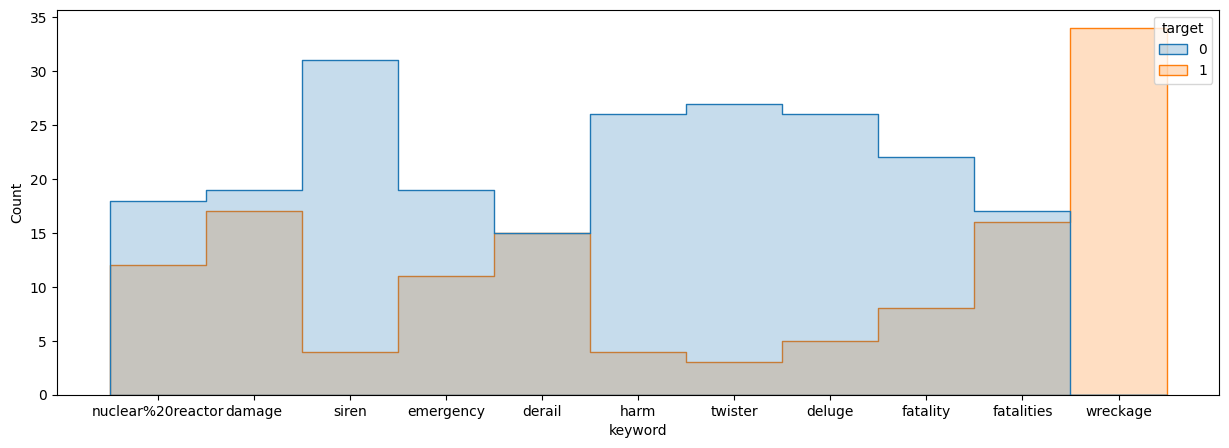

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

df = train.loc[train['keyword'].isin(['damage', 'siren', 'wreckage', 'fatalities', 'deluge', 'twister', 'fatality', 'harm', 'emergency',
 'nuclear%20reactor', 'derail'])]

plt.figure(figsize=(15,5))
sns.histplot(data=df, x="keyword", hue="target", element="step")

**Выводы**: ключевое слово wreckage свидетельствует о настоящей катастрофе/инциденте. Такие слова как damage, derail и fatalities примерно в 50% случаев свидетельствуют о настоящей катастрофе/инциденте. Что касается остальных попурных ключевых слов, они не свидельствуют о настоящей катастрофе/инциденте. 

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [92]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [103]:
train['texts']  = train[['keyword', 'location', 'text']]. agg(' '. join , axis= 1 ) 
train_new = train[['texts','target']]

In [105]:
test['texts']  = test[['keyword', 'location', 'text']]. agg(' '. join , axis= 1 ) 
test_new = test[['texts','target']]

In [104]:
train_new.loc[[6590, 7122, 2769]]

,texts,target
6590,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,violent%20storm If you were the NWS wth a rot...,1
2769,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [109]:
train_new

,texts,target
1186,bridge%20collapse Ashes 2015: AustraliaÛªs c...,0
4071,"hail Carol Stream, Illinois GREAT MICHIGAN TEC...",1
5461,police Houston CNN: Tennessee movie theater s...,1
5787,rioting Still rioting in a couple of hours le...,1
7445,wounds Lake Highlands Crack in the path where ...,0
...,...,...
5226,obliteration Merica! @Eganator2000 There aren'...,0
5390,panic just had a panic attack bc I don't have...,0
860,blood Omron HEM-712C Automatic Blood Pressure...,0
7603,Officials say a quarantine is in place at an...,1


In [169]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train_new['texts'])
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'ûóher', 'ûókody', 'ûótech'],
      dtype=object)

In [177]:
print("Размер матрицы", X.toarray().shape)

Размер матрицы (5329, 18455)


## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [161]:
import string

def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры
    for i in s:
        if i.isdigit():
            return True

def contains_punctuation(s: str) -> bool:
    # Проверка, содержит ли слово пунктуацию
    for i in s:
        if i in string.punctuation:
            return True
    
def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    if s[0] == "#":
        return True
    
def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    if s[0] == "@":
        return True

def investigate_vocabulary(vocabulary):
    digit = 0
    punc = 0
    hashtags = 0
    mentions = 0
    
    for i in vocabulary:
        if contains_digit(i):
            #print(i)
            digit += 1
        if contains_punctuation(i):
            punc += 1
        if is_hashtag(i):
            hashtags += 1
        if is_mention(i):
            mentions += 1

    print('With digit:      ', digit
          )
    print('With punctuation:', punc
          )
    print('Hashtags:        ', hashtags
          )
    print('Mentions:        ', mentions
          )

In [162]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [172]:
investigate_vocabulary(vectorizer.vocabulary_
                       )

With digit:       3812
With punctuation: 315
Hashtags:         0
Mentions:         0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [174]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [194]:
def dummy(doc):
    tw = TweetTokenizer()
    return tw.tokenize(doc)

vectorizer2 = CountVectorizer(tokenizer=dummy)
X2 = vectorizer2.fit_transform(train_new['texts'])
print("Размер матрицы", X2.toarray().shape)

Размер матрицы (5329, 19668)


In [195]:
investigate_vocabulary(vectorizer2.vocabulary_
                       )

With digit:       3940
With punctuation: 7338
Hashtags:         1470
Mentions:         1679


**Сравнение:** если не добавлять никакие параметры в TweetTokenizer, то получается больше токенов, соотвественно больше слов во всех категориях.

In [198]:
def dummy(doc):
    tw = TweetTokenizer(strip_handles=True, reduce_len=True)
    return tw.tokenize(doc)

vectorizer3 = CountVectorizer(tokenizer=dummy)
X3 = vectorizer3.fit_transform(train_new['texts'])
print("Размер матрицы", X3.toarray().shape)

Размер матрицы (5329, 17987)


In [199]:
investigate_vocabulary(vectorizer3.vocabulary_
                       )

With digit:       3646
With punctuation: 5669
Hashtags:         1470
Mentions:         10


Однако если добавить параменты strip_handles (Флаг, указывающий, следует ли удалять дескрипторы текста Twitter, используемые в методе tokenize) и reduce_len (Флаг, указывающий, заменять ли повторяющиеся последовательности символов длиной 3 или больше), кол-во слов со всех категориях сокращается, но все равно больше, чем просто при CountVectorizer.

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [299]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    if re.fullmatch(r'[a-zA-Z]+', s):
        return True

def is_emoji(s: str) -> bool:
    # Проверка, является ли слово смайликом
    for i in s:
        if not i in string.punctuation:
            return False
    if re.search(r'[(|)]+', s):
            return True

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    if s[0] == '#':
        if re.fullmatch(r'[a-zA-Z]+', s[1:]):
            return True

def custom_tokenizer(s: str) -> List[str]:    
    # Кастомный токенайзер
    s = s.lower()
    tw = TweetTokenizer()
    tokens = tw.tokenize(s)
    new_tokens = []
    
    for token in tokens:
        if contains_only_latin_letters(token) or is_emoji(token) or is_hashtag(token):
            if token not in stopwords.words('english'):
                new_tokens.append(token)
    
    stemmer = SnowballStemmer("english")
    return [stemmer.stem(w) for w in new_tokens]

In [300]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [302]:
train_new

,texts,target
1186,bridge%20collapse Ashes 2015: AustraliaÛªs c...,0
4071,"hail Carol Stream, Illinois GREAT MICHIGAN TEC...",1
5461,police Houston CNN: Tennessee movie theater s...,1
5787,rioting Still rioting in a couple of hours le...,1
7445,wounds Lake Highlands Crack in the path where ...,0
...,...,...
5226,obliteration Merica! @Eganator2000 There aren'...,0
5390,panic just had a panic attack bc I don't have...,0
860,blood Omron HEM-712C Automatic Blood Pressure...,0
7603,Officials say a quarantine is in place at an...,1


In [308]:
print([custom_tokenizer(i) for i in train_new['texts'][:11]])

[['bridg', 'ash', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia'], ['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon'], ['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic'], ['riot', 'still', 'riot', 'coupl', 'hour', 'left', 'class'], ['wound', 'lake', 'highland', 'crack', 'path', 'wipe', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee'], ['airplan', 'somewher', 'expert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', 'expert', '#mlb'], ['bloodi', 'isol', 'citi', 'world', 'perth', 'came', 'kill', 'indian', 'fun', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show', 'boast'], ['burn', 'except', 'idk', 'realli', 'burn'], ['destroy', '(', 'ask', ')', 'destroy', 'hous'], ['wound', 'maracay', 'nirgua', 'venezuela', 'polic', 'offic', 'wound'

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [336]:
from sklearn.preprocessing import MaxAbsScaler

y_train = train_new['target']
y_test = test_new['target']

X_train = train_new['texts']
X_test = test_new['texts']

vectorizer = CountVectorizer(tokenizer=custom_tokenizer
                             )

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(5329, 10482)
(2284, 10482)


2. Обучите LogisticRegression на полученных признаках.


In [337]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [339]:
lr_prediction = logreg.predict(X_test)

3. Посчитайте метрику f1-score на тестовых данных.

In [340]:
from sklearn.metrics import f1_score

f1_score(y_test, lr_prediction)

0.7436182019977803

## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [345]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1
y_train = train_new['target']
y_test = test_new['target']

X_train = train_new['texts']
X_test = test_new['texts']

vectorizer1 = TfidfVectorizer(tokenizer=custom_tokenizer)
X_train = vectorizer1.fit_transform(X_train)
X_test = vectorizer1.transform(X_test)

scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [358]:
print(X_train.shape)
print(X_test.shape)

(5329, 10482)
(2284, 10482)


In [346]:
logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)
lr_prediction1 = logreg1.predict(X_test)

In [347]:
f1_score(y_test, lr_prediction1)

0.7467391304347826

1. **Ответ:** Качество, при использовании tf-idf векторизатора, стало немного лучше

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [359]:
# 2
y_train = train_new['target']
y_test = test_new['target']

X_train = train_new['texts']
X_test = test_new['texts']

vectorizer2 = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9)
X_train = vectorizer2.fit_transform(X_train)
X_test = vectorizer2.transform(X_test)

scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Ольга\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [360]:
logreg2 = LogisticRegression()
logreg2.fit(X_train, y_train)
lr_prediction2 = logreg2.predict(X_test)

In [361]:
f1_score(y_test, lr_prediction2)

0.7467391304347826

2. **Ответ:** Размер матрицы и качество не изменились

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

3. **Ответ:** 

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [380]:
from sklearn.feature_extraction.text import HashingVectorizer

y_train = train_new['target']
y_test = test_new['target']

X_train = train_new['texts']
X_test = test_new['texts']

vectorizer4 = HashingVectorizer(tokenizer=custom_tokenizer, n_features=5000)
X_train = vectorizer4.fit_transform(X_train)
X_test = vectorizer4.transform(X_test)

scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg4 = LogisticRegression()
logreg4.fit(X_train, y_train)
lr_prediction3 = logreg4.predict(X_test)

f1_score(y_test, lr_prediction3)

print('F1 score: ', f1_score(y_test, lr_prediction3))

F1 score:  0.7343412526997841


2. Какой из подходов показал самый высокий результат?

2. **Ответ:**  Качество, при использовании tf-idf векторизатора, оказалось самым высоким.

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [401]:
y_train = train_new['target']
y_test = test_new['target']

X_train = train_new['texts']
X_test = test_new['texts']

vectorizer5 = TfidfVectorizer(tokenizer=custom_tokenizer, max_features=5000)
X_train = vectorizer5.fit_transform(X_train)
X_test = vectorizer5.transform(X_test)

scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg5 = LogisticRegression()
logreg5.fit(X_train, y_train)
lr_prediction5 = logreg5.predict(X_test)

print('F1 score: ', f1_score(y_test, lr_prediction5))

C:\Users\Ольга\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1 score:  0.7509536784741145
